# Fast Iterative Solvers - Project 2

Name: Sebastian Bennet Linden<br>
Matriculation Number: 409559

## Read Project 2 Matrix
Use existing code from project 1

In [14]:
from msr_reader import msr_reader
import os
import numpy as np

In [61]:
# Paths
directory = os.getcwd()
# directory += "\\project_1_matrices\\"
matrix_files = ["\\project2_spd_matrix.txt"] # 0
# matrix_files = ["cg_matrix_msr_1.txt", # 0
#                 "cg_matrix_msr_2.txt"] #1

# Read each matrix
matrices = []
for file in matrix_files:
    path = directory + f"{file}"
    matrices.append(msr_reader(path))

## Power Iterations Algorithm

In [64]:
def power_iterations(A):
    N = A.shape[0]
    q = np.ones(N) / np.sqrt(N)
    tol = 1e-8
    iterations = 0
    lambdas = []
    improvements = []
    while True:
        iterations += 1
        z = A.dot(q)
        q = z / np.linalg.norm(z)
        l = q.conj().T.dot(A.dot(q))
        lambdas.append(l)
        if iterations > 1:
            improvement = abs(l - lambdas[-2])
            improvements.append(improvement)
            if improvement < tol:
                print(l)
                break
    return iterations, improvements



iterations, improvements = power_iterations(matrices[0])
print(len(improvements))

94759580.76483318
115


<function matplotlib.pyplot.show(close=None, block=None)>

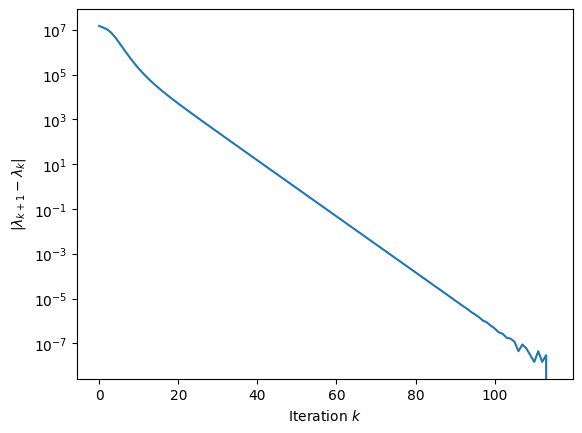

In [63]:
import matplotlib.pyplot as plt

I = range(iterations-1)
plt.plot(I,improvements)
# plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Iteration $k$")
plt.ylabel(r"$|\lambda_{k+1}-\lambda_k|$")
plt.show